In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/salaries_data.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [3]:
df.shape

(500, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [5]:
# No null values --> OK

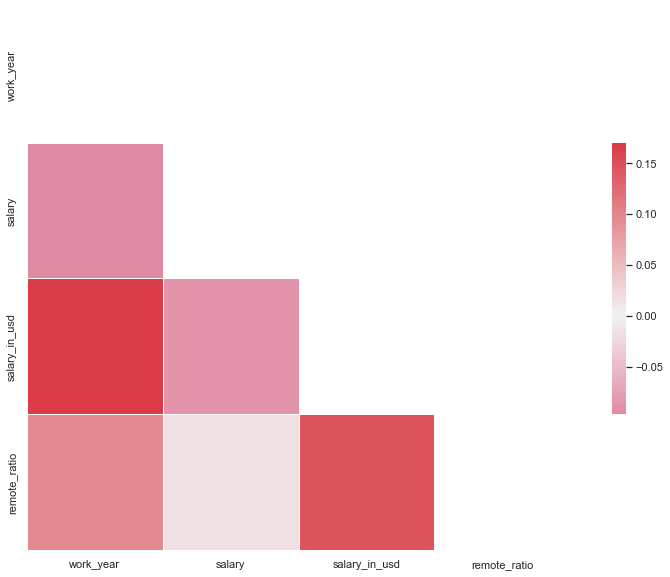

In [6]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
def unique_values():
    for e in df.columns:
        print(df[e].unique())  

In [9]:
df.job_title.value_counts()

Data Scientist                              121
Data Engineer                               111
Data Analyst                                 81
Machine Learning Engineer                    31
Research Scientist                           12
Data Science Manager                         12
Data Architect                                8
Machine Learning Scientist                    7
Data Analytics Manager                        7
Big Data Engineer                             7
Director of Data Science                      7
ML Engineer                                   6
Lead Data Engineer                            6
Principal Data Scientist                      6
Applied Data Scientist                        5
Data Engineering Manager                      5
Data Science Consultant                       5
AI Scientist                                  5
BI Data Analyst                               5
Head of Data                                  4
Business Data Analyst                   

In [10]:
unique_values()

[2022 2021 2020]
['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['Data Engineer' 'BI Data Analyst' 'ML Engineer'
 'Machine Learning Scientist' 'Data Scientist' 'Data Analyst'
 'Machine Learning Engineer' 'Principal Data Scientist'
 'Data Engineering Manager' 'Data Analytics Manager' 'Big Data Engineer'
 'Research Scientist' 'Machine Learning Developer'
 'Computer Vision Engineer' 'AI Scientist' 'Machine Learning Manager'
 'Lead Data Scientist' 'Director of Data Science'
 '3D Computer Vision Researcher' 'Data Specialist'
 'Applied Data Scientist' 'Data Science Engineer' 'Head of Data'
 'Analytics Engineer' 'ETL Developer' 'Marketing Data Analyst'
 'Data Architect' 'Data Science Consultant' 'Principal Data Analyst'
 'Head of Data Science' 'Lead Data Engineer' 'Data Science Manager'
 'Applied Machine Learning Scientist' 'Lead Data Analyst'
 'Cloud Data Engineer' 'Lead Machine Learning Engineer'
 'Machine Learning Infrastructure Engineer' 'Big Data Architect'
 'Product Data Analyst' 'Business

In [11]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [12]:
experience_level={'SE':0, 'MI':1,  'EN':2, 'EX':3}

employment_type={'FT':0, 'CT':1,  'FL':2, 'PT':3}


salary_currency={'USD':0, 'EUR':1, 'INR':2, 'GBP':3, 'JPY':4, 'CAD':5, 'MXN':6, 'CHF':7, 'CLP':8, 'TRY':9, 'AUD':10, 'BRL':11,
 'HUF':12, 'PLN':13, 'SGD':14}

employee_residence={'US':0, 'RO':1, 'FR':2, 'GR':3, 'SI':4, 'DE':5, 'IN':6, 'GB':7, 'PK':8, 'MD':9, 'JP':10, 'CA':11, 'PT':12, 'IE':13,
 'AE':14, 'IT':15, 'MX':16, 'VN':17, 'BE':18, 'KE':19, 'ES':20, 'CH':21, 'CL':22, 'JE':23, 'TR':24, 'NZ':25, 'UA':26, 'AU':27,
 'NG':28, 'BG':29, 'HK':30, 'EE':31, 'CZ':32, 'RU':33, 'PR':34, 'AT':35, 'BR':36, 'DZ':37, 'IR':37, 'NL':38, 'RS':39, 'HU':40,
 'PL':41, 'HN':42, 'MY':43, 'BO':44, 'MT':45, 'LU':46, 'SG':47}

company_location={'US':0, 'FR':1, 'GR':2, 'LU':3, 'SI':4, 'DE':5, 'IN':6, 'GB':7, 'PK':8, 'MD':9, 'JP':10, 'CA':11, 'AS':12, 'IE':13,
 'AE':14, 'MX':15, 'VN':16, 'BE':17, 'KE':18, 'ES':19, 'CH':20, 'CL':21, 'CN':22, 'DK':23, 'TR':24, 'NZ':25, 'PL':26, 'UA':27,
 'AU':28, 'NG':29, 'EE':30, 'CZ':31, 'AT':32, 'BR':33, 'DZ':34, 'IR':35, 'NL':36, 'HU':37, 'PT':38, 'HN':39, 'MT':40, 'RO':41,
 'SG':42}

company_size={'M':0, 'L':1, 'S':2}


job_title={'Data Engineer':2, 'BI Data Analyst':3, 'ML Engineer':3,
 'Machine Learning Scientist':8, 'Data Scientist':1, 'Data Analyst':0,
 'Machine Learning Engineer':4, 'Principal Data Scientist':3,
 'Data Engineering Manager':3, 'Data Analytics Manager':9, 'Big Data Engineer':10,
 'Research Scientist':5, 'Machine Learning Developer':3,
 'Computer Vision Engineer':3, 'AI Scientist':3, 'Machine Learning Manager':3,
 'Lead Data Scientist':3, 'Director of Data Science':11,
 '3D Computer Vision Researcher':3, 'Data Specialist':3,
 'Applied Data Scientist':3, 'Data Science Engineer':3, 'Head of Data':3,
 'Analytics Engineer':3, 'ETL Developer':3, 'Marketing Data Analyst':3,
 'Data Architect':7, 'Data Science Consultant':3, 'Principal Data Analyst':3,
 'Head of Data Science':3, 'Lead Data Engineer':3, 'Data Science Manager':6,
 'Applied Machine Learning Scientist':3, 'Lead Data Analyst':3,
 'Cloud Data Engineer':3, 'Lead Machine Learning Engineer':3,
 'Machine Learning Infrastructure Engineer':3, 'Big Data Architect':3,
 'Product Data Analyst':3, 'Business Data Analyst':3,
 'Director of Data Engineering':3, 'Data Analytics Lead':3,
 'Financial Data Analyst':3, 'Finance Data Analyst':3,
 'Head of Machine Learning':3, 'Staff Data Scientist':3,
 'Data Analytics Engineer':3, 'Computer Vision Software Engineer':3}



In [13]:
def label(s, dic):
    return dic[s]

In [14]:
df.experience_level=df.experience_level.apply(lambda x: label(x, experience_level))

df.employment_type=df.employment_type.apply(lambda x: label(x, employment_type))

df.salary_currency=df.salary_currency.apply(lambda x: label(x, salary_currency))

df.employee_residence=df.employee_residence.apply(lambda x: label(x, employee_residence))

df.company_location=df.company_location.apply(lambda x: label(x, company_location))

df.company_size=df.company_size.apply(lambda x: label(x, company_size))

df.job_title=df.job_title.apply(lambda x: label(x, job_title))

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,0,0,2,140250,0,140250,0,100,0,0
1,2022,0,0,2,135000,0,135000,0,100,0,0
2,2021,1,0,3,100000,0,100000,0,100,0,0
3,2021,1,1,3,270000,0,270000,0,100,0,1
4,2021,1,0,2,22000,1,26005,1,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           500 non-null    int64
 1   experience_level    500 non-null    int64
 2   employment_type     500 non-null    int64
 3   job_title           500 non-null    int64
 4   salary              500 non-null    int64
 5   salary_currency     500 non-null    int64
 6   salary_in_usd       500 non-null    int64
 7   employee_residence  500 non-null    int64
 8   remote_ratio        500 non-null    int64
 9   company_location    500 non-null    int64
 10  company_size        500 non-null    int64
dtypes: int64(11)
memory usage: 43.1 KB
